In [1]:
# Import the required functionality
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline  

from sklearn.impute import KNNImputer 
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters
from adjustText import adjust_text  #pip install adjustText
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import itertools 



from pandas.plotting import scatter_matrix

from sklearn import neighbors

from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score




from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

<font size = "4"><font color='blue'><br>1. DATA EXPLORATION</br>

In [2]:
df = pd.read_csv('WINE_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


A priliminary scan of the data indicates a lot of missing values for the features. 

The STARS feature in particular has 26.25% of data missing

In [3]:
for x in ['TARGET','LabelAppeal','STARS']:
    print(df[x].value_counts().shape)

(9,)
(5,)
(4,)


5 different types of Label Appeal values and 4 types of STAR ratings for the data

Lower STAR rating results in lesser number of wine TARGETS being sampled. Hence, the missing values can be imputed as 0 for STAR

In [4]:
# Mean, SD and Min-MAx of all the features

df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


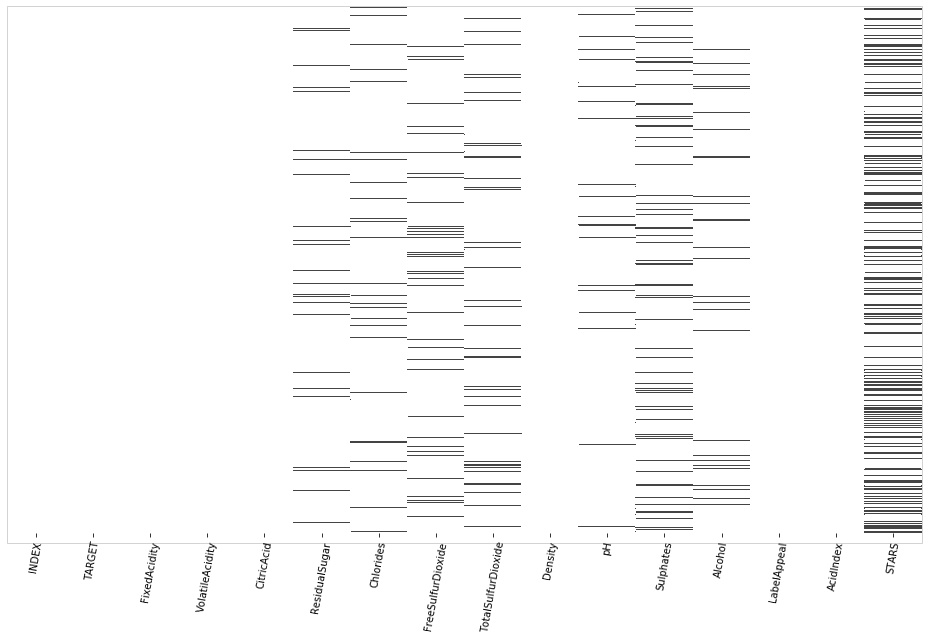

In [5]:
# Exploring data for missing values using HeatMap

naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [6]:
# Counting the missing values in the data

print(df.isnull().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


In [7]:
# Imputing missing values in STAR column with 0s

df['STARS'] = df['STARS'].fillna(0)

In [8]:
# Scaling the data using MinMax scaler

scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
scaled_data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.000000,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.50
1,0.000062,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.75
2,0.000186,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.75
3,0.000248,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.25
4,0.000310,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.50


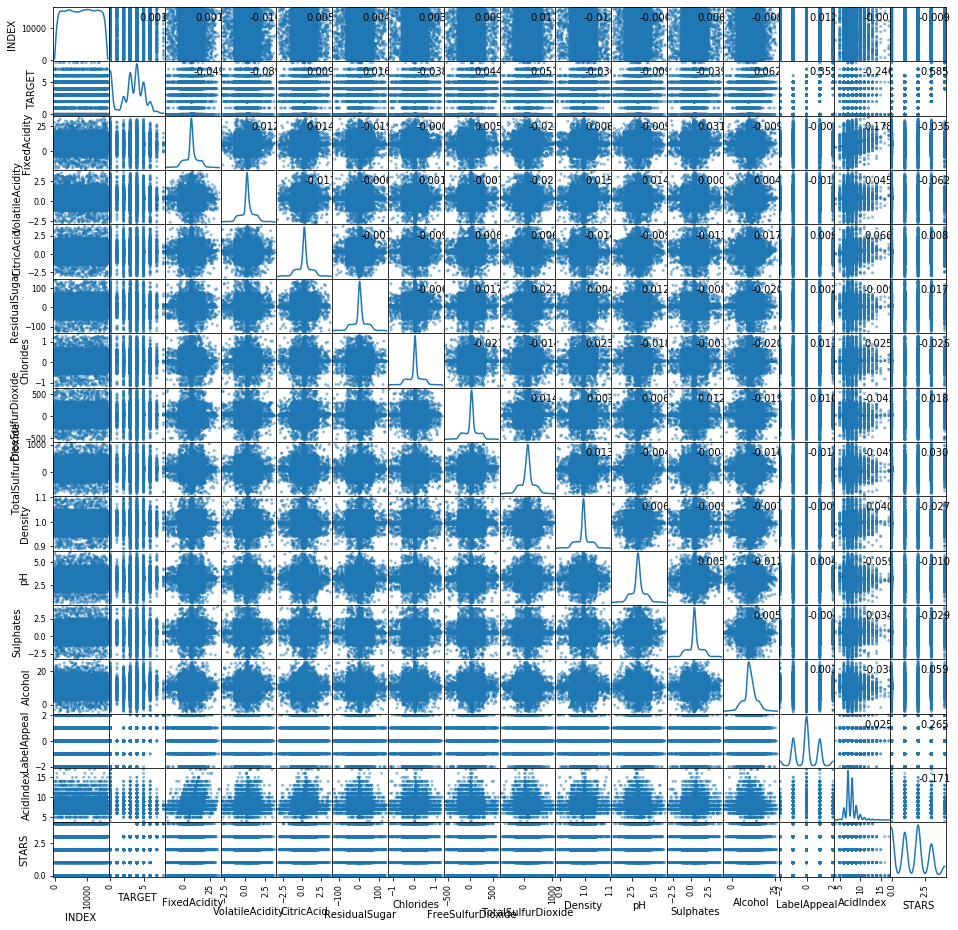

In [9]:
# Scatter Plot

axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(16, 16))
corr = scaled_data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

The Scatter plots indicate that lower Label Appeal implies lesser number of TARGET samples.


The plot of TARGEt vs STARS show greater the STAR rating, higher the number of TARGET samples sold

The scatter plots also indicate that there is no correlation between features like Ciric Acid, Acid content, Fixed Acidity etc.

The plots do not show any outlier for the features

In [10]:
scaled_data.corr()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
INDEX,1.000000,0.001256,0.001133,-0.010224,0.004922,0.003846,0.002966,0.009257,0.010756,-0.010779,-0.005853,0.006413,-0.007677,0.011553,-0.007097,-0.008883
TARGET,0.001256,1.000000,-0.049011,-0.088793,0.008685,0.016491,-0.038263,0.043824,0.051478,-0.035518,-0.009445,-0.038850,0.062062,0.356500,-0.246049,0.685381
FixedAcidity,0.001133,-0.049011,1.000000,0.012375,0.014240,-0.018855,-0.000457,0.004972,-0.022498,0.006477,-0.008983,0.030783,-0.009371,-0.003366,0.178437,-0.035416
VolatileAcidity,-0.010224,-0.088793,0.012375,1.000000,-0.016953,-0.006483,0.000987,-0.007077,-0.021080,0.014735,0.013592,0.000129,0.004073,-0.016987,0.044642,-0.062276
CitricAcid,0.004922,0.008685,0.014240,-0.016953,1.000000,-0.006940,-0.008567,0.006428,0.006320,-0.013952,-0.008709,-0.012989,0.017046,0.008650,0.065697,0.008485
ResidualSugar,0.003846,0.016491,-0.018855,-0.006483,-0.006940,1.000000,-0.005594,0.017493,0.022479,0.004101,0.012118,-0.007723,-0.019998,0.002320,-0.009414,0.017203
Chlorides,0.002966,-0.038263,-0.000457,0.000987,-0.008567,-0.005594,1.000000,-0.020661,-0.013994,0.022657,-0.017605,-0.003290,-0.019695,0.010509,0.025238,-0.024547
FreeSulfurDioxide,0.009257,0.043824,0.004972,-0.007077,0.006428,0.017493,-0.020661,1.000000,0.013720,0.003176,0.006049,0.011593,-0.018588,0.010294,-0.041717,0.018171
TotalSulfurDioxide,0.010756,0.051478,-0.022498,-0.021080,0.006320,0.022479,-0.013994,0.013720,1.000000,0.012816,-0.004343,-0.007133,-0.015957,-0.009747,-0.049311,0.029688
Density,-0.010779,-0.035518,0.006477,0.014735,-0.013952,0.004101,0.022657,0.003176,0.012816,1.000000,0.005768,-0.009059,-0.007215,-0.009370,0.040413,-0.026567


Strong positive correlation between TARGET and (LabelAppeal & STARS)

Strong negative correlation between TARGET and AcidIndex

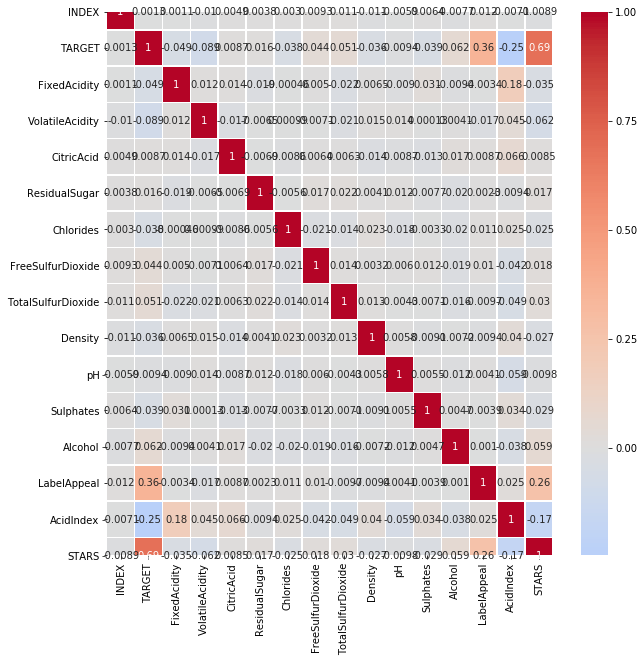

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(scaled_data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

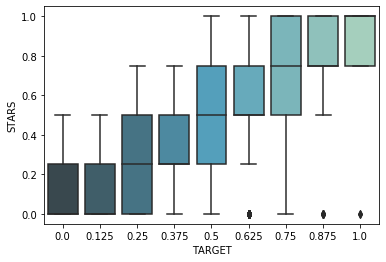

In [12]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["STARS"],data=scaled_data,palette='GnBu_d')

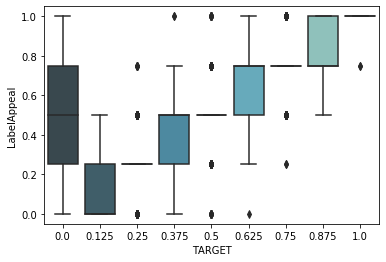

In [13]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["LabelAppeal"],data=scaled_data,palette='GnBu_d')

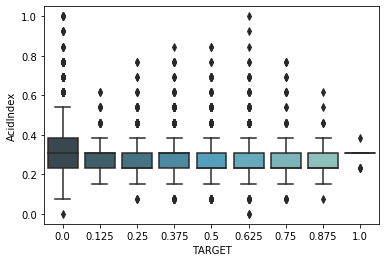

In [14]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["AcidIndex"],data=scaled_data,palette='GnBu_d')

<font size = "4"><font color='blue'><br>2. DATA PREPARATION</br>

In [15]:
scaled_data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.000000,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.50
1,0.000062,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.75
2,0.000186,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.75
3,0.000248,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.25
4,0.000310,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.50


In [16]:
scaled_data = scaled_data.drop("INDEX", axis = 1)

In [17]:
scaled_data.head(10)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.50
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.75
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.75
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.25
4,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.50
5,0.000,0.560000,0.480680,0.539437,0.483361,0.684774,0.439728,0.445745,0.527161,0.481416,0.599729,0.644231,0.50,0.538462,0.00
6,0.000,0.491429,0.476043,0.400000,0.555122,0.488105,0.714771,0.520745,0.509732,0.532743,0.588874,0.480769,0.50,0.307692,0.00
7,0.500,0.468571,0.242658,0.504225,0.480387,0.480174,0.915110,0.730851,0.683258,0.481416,NaN,0.522436,0.75,0.230769,0.75
8,0.375,0.626667,0.472952,0.604225,0.517011,0.461538,0.290323,NaN,0.512006,0.787611,0.459973,0.631410,0.50,0.153846,0.00
9,0.750,0.449524,0.397218,0.511268,0.481874,0.354481,0.523769,0.533511,0.280133,0.461947,0.526459,0.554487,0.50,0.307692,1.00


In [18]:
#Create flags to suggest if a variable was missing

missing_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'STARS']
for col in missing_cols:
    scaled_data[col+"_missing"] = np.where(scaled_data[col].isnull(), 0, 1)
    
scaled_data.head(10)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,AcidIndex,STARS,ResidualSugar_missing,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,pH_missing,Sulphates_missing,Alcohol_missing,STARS_missing
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,...,0.307692,0.50,1,1,0,1,1,1,1,1
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,...,0.230769,0.75,1,1,1,1,1,1,0,1
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,...,0.307692,0.75,1,1,1,1,1,1,1,1
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,...,0.153846,0.25,1,1,1,1,1,1,1,1
4,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,...,0.384615,0.50,1,0,1,1,1,1,1,1
5,0.000,0.560000,0.480680,0.539437,0.483361,0.684774,0.439728,0.445745,0.527161,0.481416,...,0.538462,0.00,1,1,1,1,1,1,1,1
6,0.000,0.491429,0.476043,0.400000,0.555122,0.488105,0.714771,0.520745,0.509732,0.532743,...,0.307692,0.00,1,1,1,1,1,1,1,1
7,0.500,0.468571,0.242658,0.504225,0.480387,0.480174,0.915110,0.730851,0.683258,0.481416,...,0.230769,0.75,1,1,1,1,1,0,1,1
8,0.375,0.626667,0.472952,0.604225,0.517011,0.461538,0.290323,NaN,0.512006,0.787611,...,0.153846,0.00,1,1,1,0,1,1,1,1
9,0.750,0.449524,0.397218,0.511268,0.481874,0.354481,0.523769,0.533511,0.280133,0.461947,...,0.307692,1.00,1,1,1,1,1,1,1,1


In [19]:
# Add median values (IMPUTE) to the missing values in the columns

imputer = KNNImputer(n_neighbors=2)  #impute missing values
scaled_data.iloc[:,1:]=imputer.fit_transform(scaled_data.iloc[:,1:]) #replace df with imputed missing values
scaled_data.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,AcidIndex,STARS,ResidualSugar_missing,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,pH_missing,Sulphates_missing,Alcohol_missing,STARS_missing
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,0.353990,0.580319,0.495903,0.504425,...,0.307692,0.50,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,...,0.230769,0.75,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,...,0.307692,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,...,0.153846,0.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.500,0.497143,0.482226,0.278873,0.510132,0.475020,0.329372,0.495213,0.504286,0.467257,...,0.384615,0.50,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Transform data by putting it into buckets(discretization):

3 important wine features that customers often look for are chosen and discretized/bucketed into different bins.

- Label Appeal    : "Low_Appeal","Moderately_Low_Appeal", "Moderately_High_Appeal", "High_Appeal"
- pH level        : "Very_Low", "Moderate", "Very_High"
- Alcohol content : "V_Low_Alcohol", "Low_Alcohol", "High_Alcohol", "V_High_Alcohol"
- STARS           :


In [20]:
scaled_data.groupby(['LabelAppeal']).size()

LabelAppeal
0.00     504
0.25    3136
0.50    5617
0.75    3048
1.00     490
dtype: int64

In [21]:
scaled_data['LabelAppeal_bin']=pd.cut(x=scaled_data['LabelAppeal'], bins=[0,0.25,.50,0.75,1], labels=["Low_Appeal","Moderately_Low_Appeal", "Moderately_High_Appeal", "High_Appeal"])
scaled_data['LabelAppeal_bin'].value_counts()

Moderately_Low_Appeal     5617
Low_Appeal                3136
Moderately_High_Appeal    3048
High_Appeal                490
Name: LabelAppeal_bin, dtype: int64

#### Winemakers use pH as a way to measure ripeness in relation to acidity. 

- Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth. 
- Most wine pH's fall around 3 or 4; about 3.0 to 3.4 is desirable for white wines, while about 3.3 to 3.6 is best for reds.

In [22]:
scaled_data['pH'].describe()

count    12795.000000
mean         0.482784
std          0.119271
min          0.000000
25%          0.438938
50%          0.481416
75%          0.529204
max          1.000000
Name: pH, dtype: float64

In [23]:
scaled_data['pH_bin']=pd.cut(x=scaled_data['pH'], bins=3, labels=["Very_Low","Moderate","Very_High"])
scaled_data['pH_bin'].value_counts()

Moderate     10525
Very_Low      1375
Very_High      895
Name: pH_bin, dtype: int64

#### The average glass of wine contains around 11% to 13% alcohol, but bottles range from as little as 5.5% alcohol by volume to as much as around 20% ABV. 

- Very Low (Below 12.5 Percent)
- Low (12.5 to 13.5 Percent)
- High (13.5 to 14.5 Percent)
- Very High (More Than 14.5 Percent)

In [24]:
scaled_data['Alcohol'].describe()

count    12795.000000
mean         0.486883
std          0.117976
min          0.000000
25%          0.439103
50%          0.483974
75%          0.546474
max          1.000000
Name: Alcohol, dtype: float64

In [25]:
scaled_data['Alcohol_bin']=pd.cut(x=scaled_data['Alcohol'], bins=4, labels=["V_Low_Alcohol","Low_Alcohol","High_Alcohol", "V_High_Alcohol"])
scaled_data['Alcohol_bin'].value_counts()

Low_Alcohol       7171
High_Alcohol      5058
V_Low_Alcohol      328
V_High_Alcohol     238
Name: Alcohol_bin, dtype: int64

In [26]:
scaled_data.groupby(['STARS']).size()

STARS
0.00    3359
0.25    3042
0.50    3570
0.75    2212
1.00     612
dtype: int64

In [27]:
scaled_data['STARS_bin']=pd.cut(x=scaled_data['STARS'], bins=3, labels=["Low_Rating","Moderate_Rating","High_Rating"])
scaled_data['STARS_bin'].value_counts()

Low_Rating         6401
Moderate_Rating    3570
High_Rating        2824
Name: STARS_bin, dtype: int64

In [28]:
# Mathematical Transformation

# Checking the Skewness of the data

scaled_data.skew(axis = 0, skipna = True)

TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.051587
Chlorides                     0.030444
FreeSulfurDioxide             0.002126
TotalSulfurDioxide           -0.007851
Density                      -0.018698
pH                            0.045805
Sulphates                     0.005650
Alcohol                      -0.027085
LabelAppeal                   0.008431
AcidIndex                     1.648883
STARS                         0.254900
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
pH_missing                   -5.425049
Sulphates_missing            -2.771394
Alcohol_missing              -4.080670
STARS_missing                 0.000000
dtype: float64

- If skewness value lies above +1 or below -1, data is highly skewed. 
- If it lies between +0.5 to -0.5, it is moderately skewed. 
- If the value is 0, then the data is symmetric

The AcidIndex feature is highly positively skewed with a value of 1.648883 (> 1). Hence Square Root transformation can be applied to this feature

The missing value columns are not transformed since they are added only to indicate any missing values and hence do not posses any mathematical importance as such

In [29]:
#Square root transformation, Applied to positive values only

scaled_data["AcidIndex"] = scaled_data["AcidIndex"]**(1/2)
scaled_data.skew(axis = 0, skipna = True)

TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.051587
Chlorides                     0.030444
FreeSulfurDioxide             0.002126
TotalSulfurDioxide           -0.007851
Density                      -0.018698
pH                            0.045805
Sulphates                     0.005650
Alcohol                      -0.027085
LabelAppeal                   0.008431
AcidIndex                     0.767241
STARS                         0.254900
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
pH_missing                   -5.425049
Sulphates_missing            -2.771394
Alcohol_missing              -4.080670
STARS_missing                 0.000000
dtype: float64

In [30]:
# Combine variable

From the correlation table, every feature is poorly correlated with every other feature. Hence no two variables/features are similar and therefore cannot be combined to create any new meaningful variable

In [31]:
# PCA

scaler_pca = preprocessing.MinMaxScaler()
pcs = PCA(whiten=True) #all features
scores = pd.DataFrame(pcs.fit_transform(scaler_pca.fit_transform(scaled_data.iloc[:,0:15])),
                      columns=['PC{}'.format(i) for i in range(0, 15)]) #Creating 15 PCA components
scores.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.255039,-0.245119,-0.364650,0.391278,0.970581,2.406447,1.720933,0.674460,-0.568341,-0.375579,-1.219698,-0.709594,-0.398224,-0.025500,-0.630085
1,0.575043,-1.770875,-1.080317,0.354620,0.701670,0.129278,1.524613,1.442357,-0.055401,-0.969879,1.516785,-1.447145,-0.057910,-0.264004,0.293357
2,0.965716,-1.770304,0.142900,0.106866,0.262462,-0.482989,1.074396,1.839322,1.138970,-1.294314,-1.010165,1.396062,-2.417098,2.308680,-1.046044
3,-0.457255,-0.940122,0.935361,-0.629823,0.881113,-0.299460,0.339886,0.565369,-1.217924,0.145727,-0.122643,-0.775735,-1.001239,-1.789564,1.613222
4,0.432116,-0.186139,-0.096961,-0.151235,-0.678751,-0.079686,0.242310,1.739859,-1.812462,-0.024293,-0.089551,-0.503214,-0.437241,0.724031,-1.290529


Considering all the features in the dataset for PCA except for the missing_variable columns added to indicate missing variables since they don't add any valuable analytical information for PCA

In [32]:
# Explained variance by component

pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance ratio
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Explained Variance,0.132649,0.043030,0.021446,0.016138,0.016081,0.015672,0.015298,0.015142,0.014946,0.014691,0.014329,0.014246,0.014092,0.013398,0.006714
Explained Variance Ratio,0.360584,0.116970,0.058296,0.043869,0.043714,0.042603,0.041584,0.041162,0.040628,0.039934,0.038952,0.038726,0.038307,0.036421,0.018251
Cumulative Proportion,0.360584,0.477553,0.535849,0.579719,0.623433,0.666036,0.707620,0.748782,0.789410,0.829344,0.868296,0.907021,0.945329,0.981749,1.000000


From the Explained Variance for each component, it is seen that PC0 component explains 13.27% variance within the data, PC1 explains 4.3% and so on

Text(0.5, 1.0, 'Explained Variance by Component')

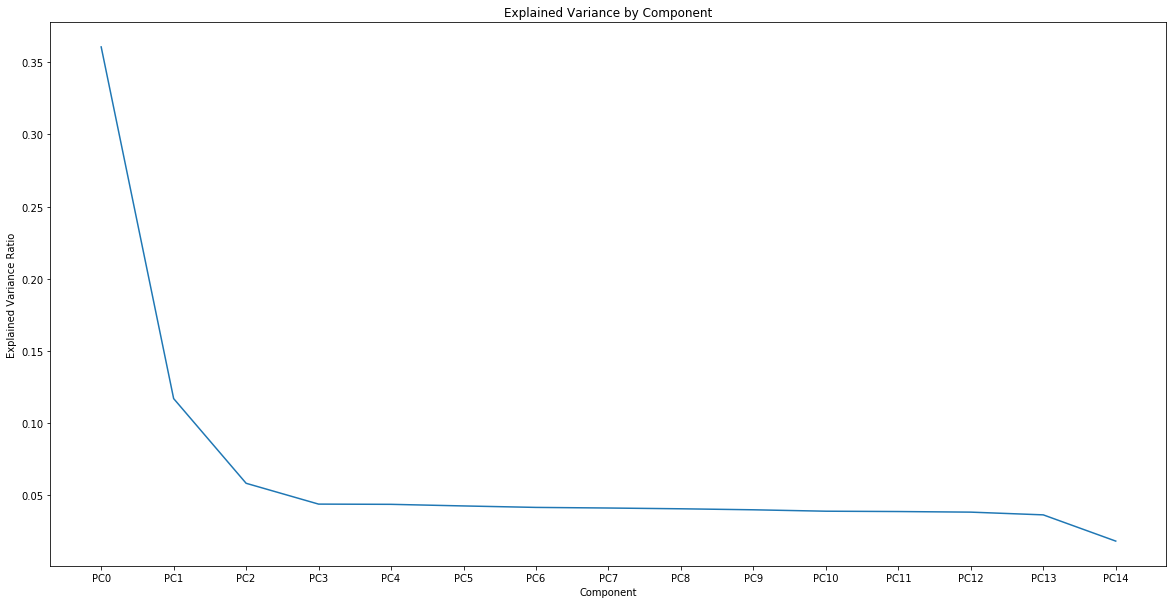

In [33]:
#scree plot

plt.figure(figsize=(20,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

The elbow rule for the scree plot using MinMax scaler indicates that 4 PCA components (PC0 - PC3) could be used for analysis.

In [34]:
#PCA- component analysis for each feature in the dataset

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=scaled_data.iloc[:,0:15].columns)
pcsComponents_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
TARGET,0.578404,0.001522,0.760620,0.035650,-0.143260,-0.105369,0.017375,0.044922,-0.062649,-0.147281,-0.071098,0.035755,0.026696,-0.069216,-0.119303
FixedAcidity,-0.016246,0.017173,-0.110797,-0.171053,-0.027849,-0.488309,0.025387,-0.181540,-0.175821,-0.358116,-0.480503,-0.228286,0.319586,0.313685,0.205894
VolatileAcidity,-0.028530,0.014123,-0.125457,0.043833,-0.021423,-0.001688,0.280168,0.312088,0.204782,-0.303377,-0.502118,0.540343,-0.310564,-0.173373,0.019891
CitricAcid,0.003651,0.004768,-0.007897,-0.206530,-0.023837,-0.109919,0.023177,-0.734489,0.031910,-0.143642,0.237639,0.506405,0.058804,-0.244041,0.083678
ResidualSugar,0.006269,-0.006687,0.025061,0.224293,0.531317,0.388732,-0.247315,-0.062983,-0.352269,-0.558334,0.040525,0.013359,-0.078592,0.081119,0.005489
Chlorides,-0.010427,0.023452,-0.097780,0.420340,-0.411706,-0.141091,-0.717932,0.047312,0.089570,-0.049140,-0.010815,0.269468,0.043375,0.144406,0.010964
FreeSulfurDioxide,0.010663,0.001941,0.131158,-0.023408,0.608373,-0.400027,-0.225473,0.008228,0.605521,0.050201,0.054069,-0.021849,-0.127962,0.104734,-0.034161
TotalSulfurDioxide,0.014437,-0.023837,0.120933,0.162660,0.249175,0.099204,-0.030578,-0.275614,-0.273691,0.613837,-0.471436,0.252345,-0.074001,0.255752,-0.028180
Density,-0.012685,0.005189,-0.062162,0.749608,0.065931,-0.397439,0.434843,-0.072244,-0.136010,-0.004726,0.225633,-0.037300,-0.025451,-0.066673,0.038824
pH,-0.003290,0.007372,0.016689,0.032637,0.153268,0.132546,0.171958,0.263901,0.110317,0.019903,0.142482,0.394161,0.778815,0.236065,-0.088367


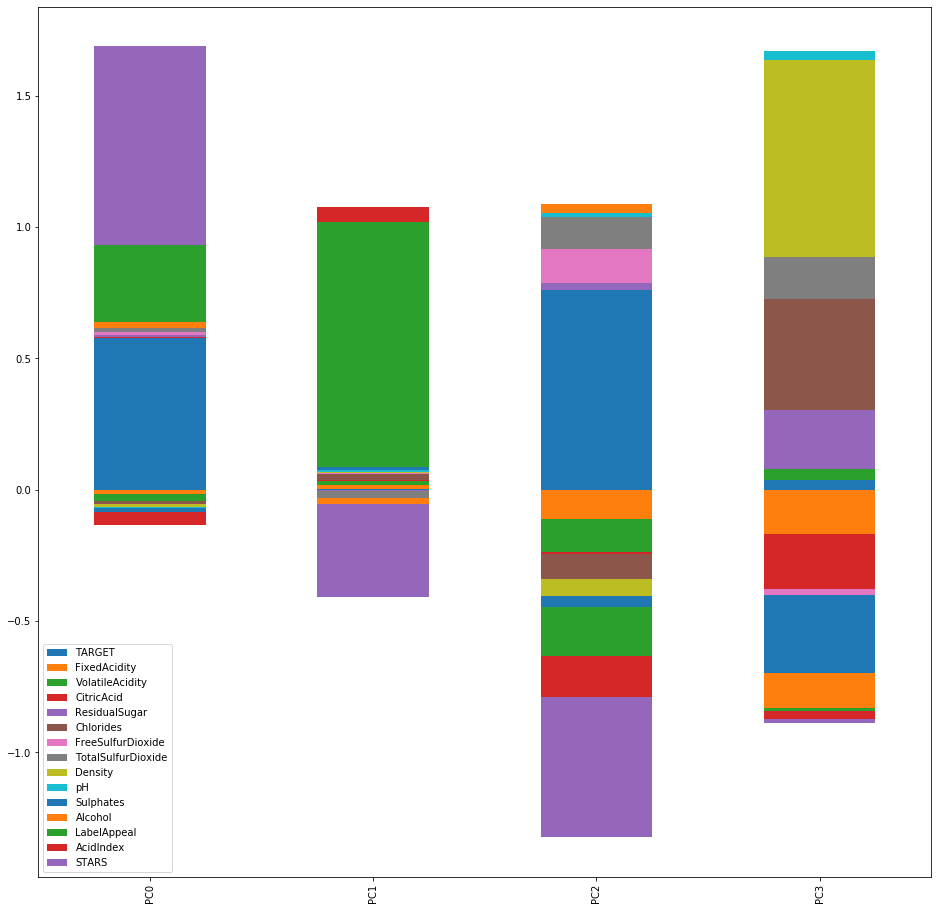

In [35]:
#Analysis of the first 3 components using stacked bar plot

pcsComponents_df[['PC0','PC1','PC2', 'PC3']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

### Analysis of PC0 - PC3 components

- PC0 : largely contains useful information on STARS, LabelAppeal & TARGET features
- PC1 : largely contains useful information on STARS & LabelAppeal features
- PC2 : largely contains useful information on STARS, LabelAppeal, TARGET & AcidIndex features
- PC3 : largely contains useful information on Density, Chlorides and Sulphates features

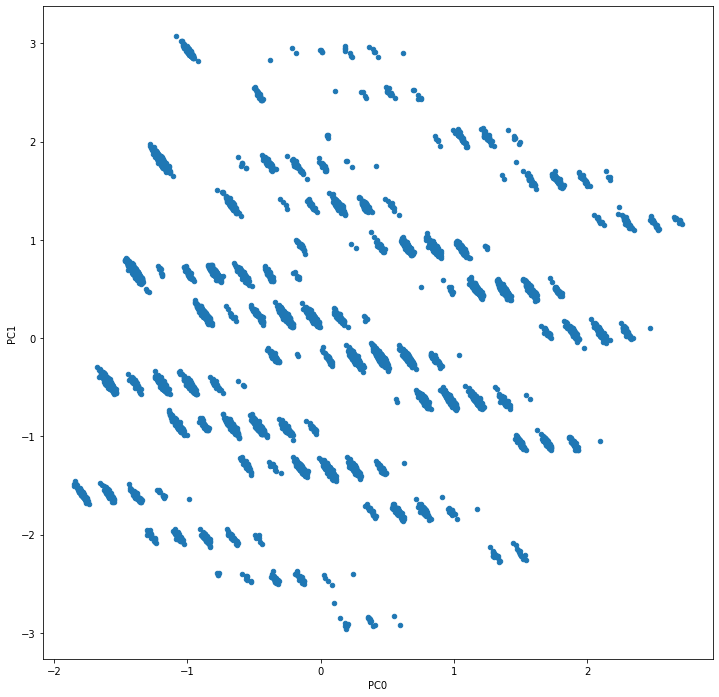

In [36]:
#Scatter plot of PC0 vs PC1

scores.plot.scatter(x='PC0', y='PC1',figsize=(12, 12)) # plot first 2 components

In [37]:
#Determining the Silhouette score and inertia of the cluster by using 4 Principal Components

col_used=['PC0', 'PC1', 'PC2', 'PC3'] #number of components used

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,25):  #Iterating until 30 where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[col_used])
    silhouette.append(silhouette_score(scores[col_used],kmeans.labels_)) #creating a list of silhouette scores
    inertia.append(kmeans.inertia_) #creating the list of inertia
    clusters.append(i)
    
print('The max silhouette value is: ',max(silhouette))

The max silhouette value is:  0.24214354066802526


In [38]:
#Evaluating KMeans Clustering for the dataset

kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters) #put silhouette and inertia in df
kmeans_eval.head(8)

,silhouette_score,inertia
2,0.242144,41339.738732
3,0.233252,33551.737085
4,0.240989,28365.859952
5,0.234598,25013.768859
6,0.230951,22921.680077
7,0.232437,21089.350881
8,0.215680,19835.755857
9,0.212783,18748.378666


The maximum Silhouette score is for a k value of 4

Text(0.5, 1.0, 'Scree Plot Inertia')

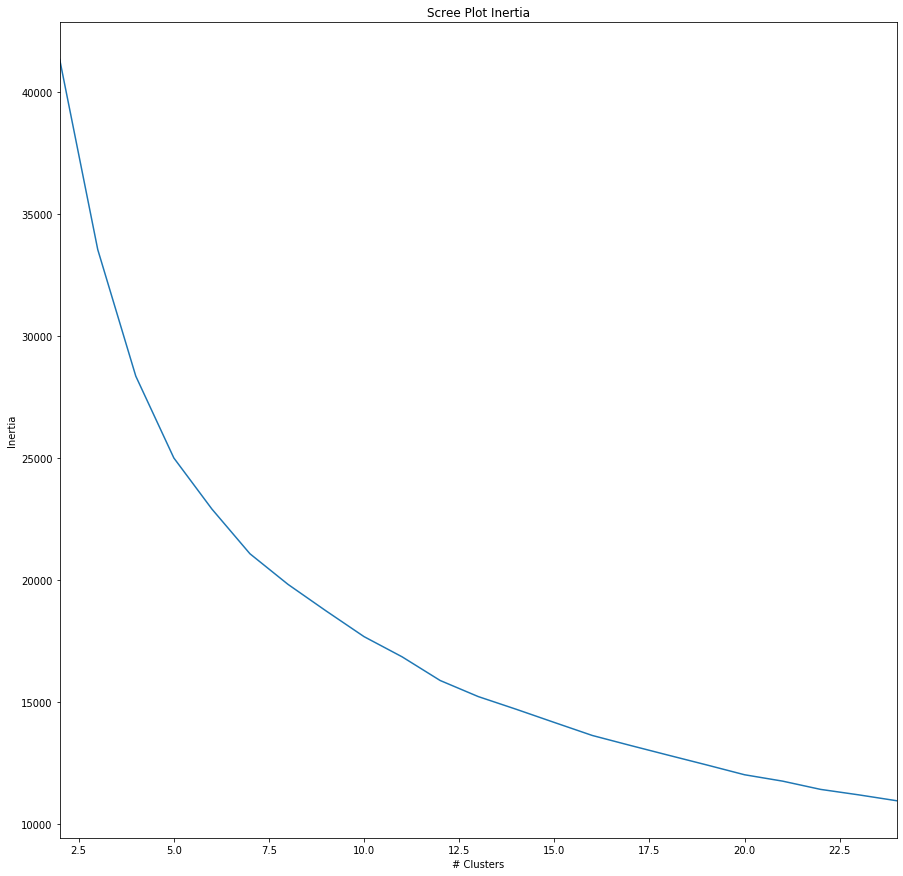

In [39]:
#Plotting the Scree Plot Inertia to identify the likely number of clusters

kmeans_eval['inertia'].plot(figsize=(15, 15))#use elbow method of finding # of components to cluster
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot Inertia')

Based on the elbow rule, the scree plot indicates that around 8 clusters can be used for KMeans clustering

Text(0.5, 1.0, 'Silhouette score by # of clusters')

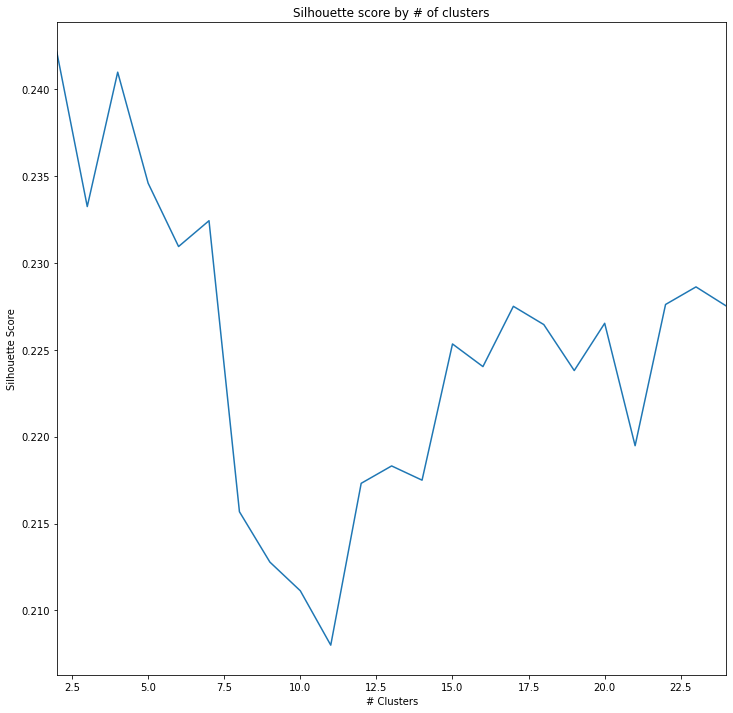

In [40]:
#Silhouette score plot further gives an idea on the number of clusters

kmeans_eval['silhouette_score'].plot(figsize=(12, 12)) #plot silhouete_score to visually look for highest value & corresponding cluster
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score by # of clusters')

The plot peaks at a value of 4. Hence choosing to divide the data into 4 clusters

In [41]:
print(kmeans_eval['silhouette_score'])

2     0.242144
3     0.233252
4     0.240989
5     0.234598
6     0.230951
7     0.232437
8     0.215680
9     0.212783
10    0.211130
11    0.207999
12    0.217317
13    0.218318
14    0.217499
15    0.225341
16    0.224038
17    0.227509
18    0.226457
19    0.223810
20    0.226531
21    0.219483
22    0.227614
23    0.228626
24    0.227521
Name: silhouette_score, dtype: float64


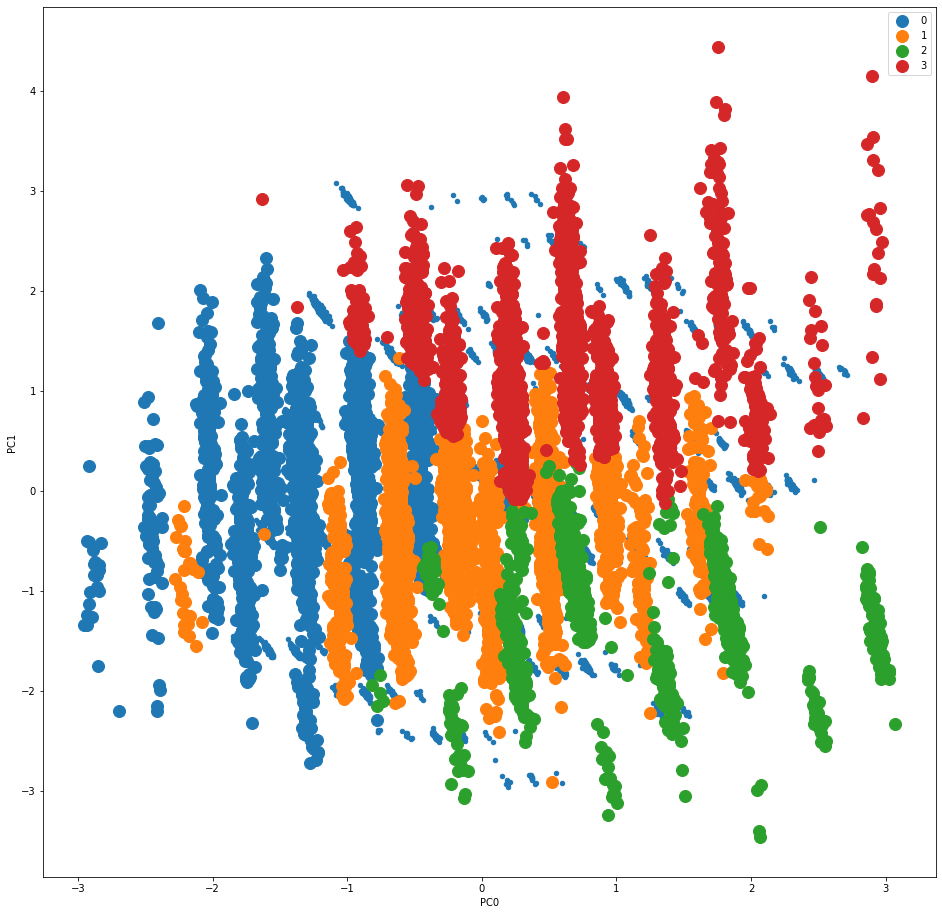

In [42]:
#Taking clusters 3 provides a well define plot

cols=['PC0','PC1', 'PC2', 'PC3'] # PCA Components used for clustering

kmeans= KMeans(n_clusters=4).fit(scores[cols]) 
scores['cluster']=kmeans.labels_

groups = scores.groupby('cluster')

scaled_data['cluster']=scores['cluster']
ax = scores.plot.scatter(x='PC0', y='PC1', figsize=(16, 16))
points = scores[['PC0','PC1']]


for name, group in groups: 
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() 

<font size = "4"><font color='blue'><br>3. BUILD MODELS</br>

In [58]:
# Data Partitioning

predictors = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS']

outcome = df['TARGET']

X = pd.get_dummies(scaled_data[predictors], drop_first=True)
y = preprocessing.label_binarize(outcome, classes=[0, 1, 2, 3])



In [60]:
#Naive bayes needs all columns to be categorical.

for x in X.columns:
    if X[x].dtype =='int32' or X[x].dtype =='float64' or X[x].dtype == 'uint8':
        X[x]=X[x].astype('category')
      

In [61]:
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.3, random_state=1)

print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)


Training :  (6397, 14)
Validation :  (4478, 14)
Test :  (1920, 14)


# Run a naive Bayes classifier on the complete training set with the relevant predictors
wines_nb = MultinomialNB(alpha=0.01)
wines_nb.fit(train_X, train_y)

In [76]:
# Return Probability estimates
predProb_train = wines_nb.predict_proba(train_X)
predProb_valid = wines_nb.predict_proba(valid_X)

pd.DataFrame(predProb_valid)

,0,1,2,3,4,5,6,7,8
0,0.154406,0.012773,0.086361,0.221587,0.282457,0.171123,0.059999,0.010415,0.000879
1,0.279718,0.021874,0.105906,0.207942,0.222034,0.118749,0.037072,0.006224,0.000484
2,0.294415,0.015966,0.086438,0.195970,0.227149,0.128685,0.043229,0.007532,0.000616
3,0.212323,0.014113,0.086643,0.211258,0.259310,0.153645,0.052645,0.009288,0.000775
4,0.143631,0.011464,0.080854,0.215959,0.287332,0.183398,0.064493,0.011836,0.001033
...,...,...,...,...,...,...,...,...,...
4473,0.063083,0.003893,0.046189,0.185794,0.322383,0.250739,0.104884,0.020925,0.002111
4474,0.099278,0.007063,0.063649,0.206613,0.309554,0.215034,0.082118,0.015235,0.001457
4475,0.215635,0.010750,0.074308,0.201700,0.264374,0.163915,0.057924,0.010513,0.000881
4476,0.151294,0.006749,0.060897,0.198030,0.292966,0.198747,0.075277,0.014804,0.001236


In [77]:
# Predict classification
y_valid_pred = wines_nb.predict(valid_X)
y_train_pred = wines_nb.predict(train_X)

In [101]:
df_valid=pd.DataFrame()
df_valid['class']=valid_y
df_valid['proba']=predProb_valid[:,1]
df_valid['y_true']=[1 if p > 3.029074 else 0 for p in valid_y]
df_valid['y_pred']=[1 if p > 1.894039e-02 else 0 for p in df_valid.proba]


In [102]:
df_valid.head(100)

,class,proba,y_true,y_pred
5540,4,7.614064e-04,1,0
11529,2,1.029618e-01,0,1
584,0,3.905818e-03,0,0
8978,3,3.383317e-03,0,0
4799,5,3.972458e-04,1,0
...,...,...,...,...
2174,2,6.583100e-03,0,0
8136,5,7.907321e-07,1,0
10197,3,7.439319e-02,0,1
7833,0,9.532811e-05,0,0


In [51]:
def evaluate_performance(actual,propensity,cutoff):
    
    cm = confusion_matrix(actual,[1 if p > cutoff else 0 for p in propensity]).ravel()
    
    tn=cm[0]
    fp=cm[1]
    fn=cm[2]
    tp=cm[3]
    n=tn+fp+fn+tp
    predictive_accuracy = (tn + tp)/n 
    
    true_positive_rate = tp / (tp + fn)
    sensitivity = true_positive_rate
    recall  = true_positive_rate
    hit_rate = true_positive_rate

    true_negative_rate = tn / (fp + tn)
    specificity = true_negative_rate
   
    precision= tp / (tp + fp)
    positive_predictive_value=precision

    false_positive_rate=fp / (fp+tn)
    fall_out=false_positive_rate

    false_negative_rate=fn/(fn+tp)
    miss_rate=false_negative_rate
  
    negative_predictive_value=tn/(tn+fn)  
   
    false_discovery_rate=fp/(tp+fp)

    informedness=sensitivity + specificity - 1

    markedness=precision + negative_predictive_value
    
    accuracy_scor=accuracy_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    average_precision_scor=average_precision_score(actual,[1 if p > cutoff else 0 for p in propensity])
        
    f1_scor=f1_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    log_loss_=log_loss(actual,[1 if p > cutoff else 0 for p in propensity])
    
    roc_auc_scor=roc_auc_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    return "True negative "+ str(tn), \
           "False positive "+str(fp),\
           "False negative "+str(fn),\
           "True positive "+str(tp),\
           "Predictive accuracy "+ str(predictive_accuracy),\
           "True positive rate "+str(true_positive_rate),\
           "Sensitivity "+str(sensitivity),\
           "Recall "+str(recall),\
           "Hit rate "+str(hit_rate),\
           "True negative rate "+str(true_negative_rate),\
           "Specificity "+str(specificity),\
           "Precision "+str(precision),\
           "Positive predictive value " + str(positive_predictive_value),\
           "False_positive_rate "+str(false_positive_rate),\
           "Fall_out "+str(fall_out),\
           "False_negative_rate "+str(false_negative_rate),\
           "Miss_rate "+str(miss_rate),\
           "Negative_predictive_value "+str(negative_predictive_value), \
           "False_discovery_rate "+str(false_discovery_rate), \
           "Informedness "+str(informedness),\
           "Markedness "+str(markedness),\
           "Accuracy score "+str(accuracy_scor),\
           "Average_precision_score "+str(average_precision_scor),\
           "F1_score "+str(f1_scor),\
           "Log_loss "+str(log_loss_),\
           "Roc auc score "+str(roc_auc_scor)



In [104]:
actual=valid_y
propensity=pd.DataFrame(wines_nb.predict_proba(valid_X)).iloc[:,1]
evaluate_performance(actual=actual,
                     propensity=propensity,
                     cutoff=0.5) # what cut off here ?

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars


ValueError: multiclass format is not supported

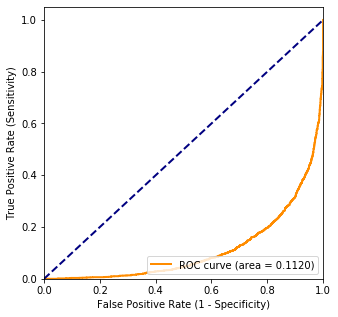

In [84]:
fpr, tpr, _ = roc_curve(df_valid.y_true, df_valid.proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

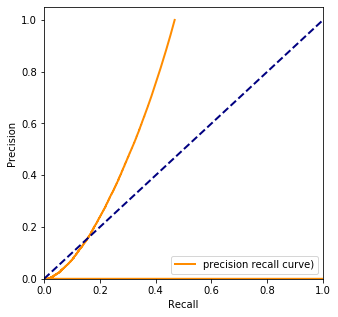

In [85]:
precision_recall_curve(df_valid.y_true, df_valid.proba)

precision, recall, _ = precision_recall_curve(df_valid.y_true, df_valid.proba)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()

MLP CLASSIFIER

In [86]:
classes = sorted(np.unique(y))

wines_clf = MLPClassifier(hidden_layer_sizes=(4), activation='logistic', solver='lbfgs', random_state=1,max_iter=200)
wines_clf.fit(X, y)
wines_clf.fit(X=X.values, y=y.values) 
wines_clf.predict(X)

# Network structure
print('Intercepts')
print(wines_clf.intercepts_)

print('Weights')
print(wines_clf.coefs_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Intercepts
[array([ 5.22359543, -2.19205689, -2.65550033,  0.45250068]), array([-3.2698552 , -5.94767043, -3.69085363, -2.53227675,  1.98225143,
        3.59949439,  5.05466982,  3.66345826,  1.61344103])]
Weights
[array([[-0.127466  ,  0.21702731, -1.56935549, -0.01342261],
       [ 0.38438953, -0.10586583, -1.40822227,  0.43062343],
       [-0.01589629, -0.06828568, -1.41875574, -0.10709372],
       [ 0.33148039,  0.17034937, -1.63622568,  0.05030069],
       [ 0.30752099, -0.12806229, -1.52949706,  0.13865704],
       [ 0.04105828,  0.28135811, -1.50192433, -0.22998181],
       [ 0.45102569, -0.74870063, -1.65185184, -0.45790556],
       [ 0.36312336, -0.41231665, -1.59678261,  0.1060302 ],
       [-0.41856609,  0.47516416, -1.19939222,  0.22046367],
       [-0.09961468,  0.08019858, -1.66355152,  0.18224018],
       [-1.64472601,  1.47613799, -1.58564894, -0.05538544],
       [-5.98126962,  6.44606075, -2.41329285, -0.35603125],
       [ 0.80218608, -0.65662604, -1.62396413,  1.836

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [89]:
# Prediction
print(pd.concat([ X,pd.DataFrame(wines_clf.predict_proba(X), columns=classes)], axis=1))

      FixedAcidity VolatileAcidity CitricAcid ResidualSugar Chlorides  \
0         0.405714        0.610510   0.318310      0.676706  0.239492   
1         0.430476        0.455951   0.342254      0.572225  0.295797   
2         0.480000        0.839258   0.332394      0.530210  0.478985   
3         0.453333        0.490726   0.461972      0.545083  0.295797   
4         0.497143        0.482226   0.278873      0.510132  0.475020   
...            ...             ...        ...           ...       ...   
12790     0.440000        0.309119   0.739437      0.493772  0.481364   
12791     0.514286        0.503864   0.497183      0.790853  0.567010   
12792     0.459048        0.457496   0.301408      0.612753  0.495242   
12793     0.491429        0.480680   0.473239      0.370701  0.475813   
12794     0.443810        0.425039   0.342254      0.671128  0.369350   

      FreeSulfurDioxide TotalSulfurDioxide   Density        pH Sulphates  ...  \
0              0.353990           0.580319

In [90]:
# Return Probability estimates
predProb_train = wines_clf.predict_proba(train_X)
predProb_valid = wines_clf.predict_proba(valid_X)

pd.DataFrame(predProb_valid)

,0,1,2,3,4,5,6,7,8
0,0.043001,7.614064e-04,3.301141e-02,0.301786,0.463872,0.142837,0.014175,4.905684e-04,6.599807e-05
1,0.303186,1.029618e-01,3.281268e-01,0.232318,0.031509,0.001824,0.000074,7.705646e-07,1.674497e-07
2,0.828141,3.905818e-03,2.985104e-02,0.091101,0.041726,0.005042,0.000228,4.044600e-06,8.359667e-07
3,0.232284,3.383317e-03,6.940380e-02,0.365512,0.275713,0.050363,0.003251,7.743201e-05,1.248828e-05
4,0.013966,3.972458e-04,2.439962e-02,0.267009,0.494841,0.178049,0.020450,7.907037e-04,9.709150e-05
...,...,...,...,...,...,...,...,...,...
4473,0.000037,4.412408e-09,8.091687e-07,0.000071,0.021932,0.232241,0.505518,2.197487e-01,2.045055e-02
4474,0.001230,3.098576e-06,3.994328e-04,0.013367,0.269597,0.476938,0.210403,2.544046e-02,2.622386e-03
4475,0.374187,1.002773e-04,2.990199e-03,0.047957,0.310471,0.222668,0.038773,2.468486e-03,3.855394e-04
4476,0.012869,1.428860e-07,7.620244e-06,0.000401,0.062253,0.366846,0.420843,1.207750e-01,1.600383e-02


In [91]:
# Predict classification
y_valid_pred = wines_clf.predict(valid_X)
y_train_pred = wines_clf.predict(train_X)

In [63]:
df_valid=pd.DataFrame()
df_valid['class']=valid_y
df_valid['proba']=predProb_valid[:,1]
#df_valid['y_true']=[1 if p == 'YES' else 0 for p in df_valid['class']]  ?????
#df_valid['y_pred']=[1 if p > 0.5 else 0 for p in df_valid.proba]

In [64]:
df_valid

,class,proba,y_true,y_pred
5540,0,4.267453e-08,0,0
11529,0,4.959643e-08,0,0
584,0,5.100604e-08,0,0
8978,0,1.781049e-04,0,0
4799,0,3.738753e-04,0,0
...,...,...,...,...
4316,0,2.483503e-01,0,0
4761,0,1.658711e-05,0,0
9132,0,6.317147e-04,0,0
5113,0,1.828465e-03,0,0


In [65]:
actual=valid_y
propensity=pd.DataFrame(wines_clf.predict_proba(valid_X)).iloc[:,1]
evaluate_performance(actual=actual,
                     propensity=propensity,
                     cutoff=0.5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars


('True negative 4471',
 'False positive 0',
 'False negative 7',
 'True positive 0',
 'Predictive accuracy 0.9984368021438143',
 'True positive rate 0.0',
 'Sensitivity 0.0',
 'Recall 0.0',
 'Hit rate 0.0',
 'True negative rate 1.0',
 'Specificity 1.0',
 'Precision nan',
 'Positive predictive value nan',
 'False_positive_rate 0.0',
 'Fall_out 0.0',
 'False_negative_rate 1.0',
 'Miss_rate 1.0',
 'Negative_predictive_value 0.9984368021438143',
 'False_discovery_rate nan',
 'Informedness 0.0',
 'Markedness nan',
 'Accuracy score 0.9984368021438143',
 'Average_precision_score 0.0015631978561857973',
 'F1_score 0.0',
 'Log_loss 0.053990941215805985',
 'Roc auc score 0.5')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


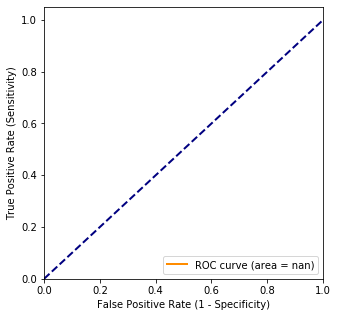

In [66]:
fpr, tpr, _ = roc_curve(df_valid.y_true, df_valid.proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


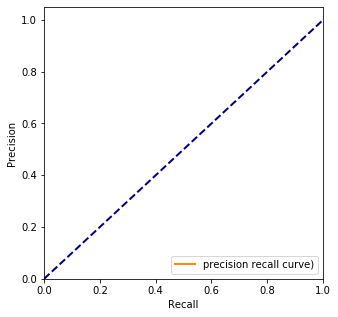

In [67]:
precision_recall_curve(df_valid.y_true, df_valid.proba)

precision, recall, _ = precision_recall_curve(df_valid.y_true, df_valid.proba)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()

In [62]:
hidden_layer=[]
for l in range(1,6):
    for n in range(1,10):
        hidden_layer.append((l,n))


In [63]:
param_grid = {
    'hidden_layer_sizes': hidden_layer,
    'activation':  ['identity', 'logistic', 'tanh', 'relu'],
    }

gridSearch = GridSearchCV(MLPClassifier(#activation='logistic',
    solver='lbfgs', 
    random_state=1,max_iter=1000),param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.6166922400312744
Initial parameters:  {'activation': 'relu', 'hidden_layer_sizes': (4, 4)}


In [48]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

    param_hidden_layer_sizes  mean_test_score  std_test_score
0                     (1, 1)         0.417698        0.007892
1                     (1, 2)         0.417698        0.007752
2                     (1, 3)         0.417385        0.007884
3                     (1, 4)         0.418010        0.008093
4                     (1, 5)         0.417385        0.008233
..                       ...              ...             ...
175                   (5, 5)         0.453336        0.043013
176                   (5, 6)         0.417229        0.008771
177                   (5, 7)         0.343121        0.113414
178                   (5, 8)         0.435041        0.035487
179                   (5, 9)         0.250586        0.000479

[180 rows x 3 columns]


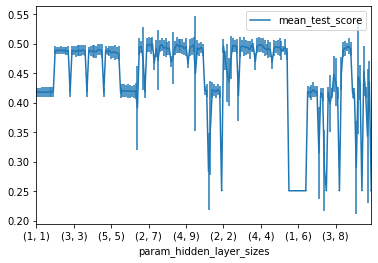

In [49]:
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                                                   y='mean_test_score', yerr='std_test_score')

In [54]:
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(4,8), activation='relu', solver='lbfgs',
                    random_state=1,max_iter=300)
clf.fit(train_X, train_y.values)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
actual=valid_y
propensity=pd.DataFrame(clf.predict_proba(valid_X)).iloc[:,1]

print(propensity)

evaluate_performance(actual=actual,
                     propensity=propensity,
                     cutoff=0.5)

0       0.000977
1       0.065764
2       0.049434
3       0.007457
4       0.000401
          ...   
4473    0.000007
4474    0.000006
4475    0.000618
4476    0.000006
4477    0.000006
Name: 1, Length: 4478, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars


ValueError: multiclass format is not supported

In [57]:
fpr, tpr, _ = roc_curve(actual,propensity)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

ValueError: multiclass format is not supported

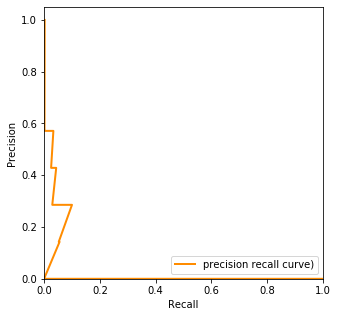

In [75]:
precision, recall, _ = precision_recall_curve(actual, propensity)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()